In [1]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd  
from sklearn.model_selection import train_test_split   
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import metrics
import keras.backend as k
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.python.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC 
from glob import glob
from skimage.io import imread, imshow
from skimage.transform import resize
import random


from tensorflow.python.keras.utils.np_utils import to_categorical

2022-10-08 01:35:10.543251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 01:35:12.386173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-08 01:35:12.386255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 01:35:12.681598: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-08 01:35:18.114587: W tensorflow/stream_executor/platform/de

In [2]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s=imread(h,as_gray=True)
        s=resize(s,(50,50))
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['early-blight', 'backkleg', 'safe', 'septoria', 'late-blight']
1608


In [ ]:

flat_data_arr=[] #input array
target_arr=[] #output array
for i in l:
    p=glob(i+"/"+"*.*")
    
    for j in p:
        #print(j)
        
        s=imread(j,as_gray=True)
        s=resize(s,(50,50))
        #print(s.dtype,len(s))
        
        '''
        mean = np.mean(s, axis=(1,2), keepdims=True)
        std = np.std(s, axis=(1,2), keepdims=True)
        img_std = (s - mean) / std
        '''
        extract.append([np.array(s),i[17:]])

    
#df=pd.DataFrame(flat_data) #dataframe
#df['Target']=target

In [75]:
extract[0][0].dtype

dtype('float64')

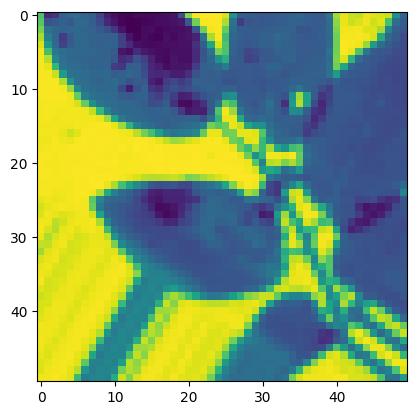

In [76]:
plt.imshow(extract[100][0])

In [3]:
random.seed(42)
random.shuffle(extract)
print(len(extract))

1608


In [103]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)



In [51]:
samples,nx,ny=x.shape
x=x.reshape(samples,nx*ny)
x.shape

(1608, 2500)

In [104]:
class_final=[]
for i in y:
    if i=="septoria":
        class_final.append(1)
    elif i=="early-blight":
        class_final.append(2)
    elif i=="late-blight":
        class_final.append(3)
    elif i=="backkleg":
        class_final.append(4)
    
    else:
        class_final.append(0)
class_final=np.array(class_final)

In [105]:
y=class_final
y

array([3, 4, 4, ..., 2, 2, 3])

In [106]:

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.25,random_state=12345)
print(x_train.shape)


(1206, 50, 50)


In [56]:
k.clear_session()

In [86]:
model=SVC(C=10,kernel="poly",degree=5,gamma=1)

In [87]:
model.fit(x_train,y_train)

SVC(C=10, degree=5, gamma=1, kernel='linear')

In [88]:
s123=model.predict(x_test)

In [89]:
metrics.accuracy_score(y_test,s123)

0.5422885572139303

In [107]:
from sklearn.ensemble import RandomForestClassifier 
rlf=RandomForestClassifier(n_estimators=90,criterion="gini")

In [108]:
rlf.fit(x_train,y_train)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [85]:
metrics.accuracy_score(y_test,rlf.predict(x_test))

0.8308457711442786

[3]


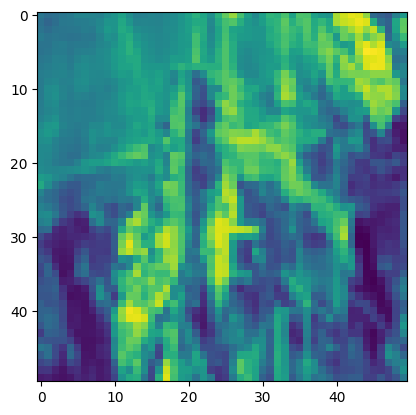

In [94]:
s12=imread("test/index.jpeg",as_gray=True)
s12=resize(s12,(50,50))

plt.imshow(s12)
s12=s12.reshape(-1,50,50,1)
samples,nx,ny,nz=s12.shape
s12=s12.reshape(samples,nx*ny*nz)
print(rlf.predict(s12))

In [63]:
#save model
import pickle
filename="svc_model.sav"
pickle.dump(model,open(filename,"wb"))

In [ ]:
print(x_test.shape,y_test.shape)

(360, 115600) (720, 1)


In [64]:
loaded_model=pickle.load(open(filename,"rb"))
print(loaded_model.score(x_test,y_test))


0.9111111111111111


In [67]:
xg=xgb.XGBClassifier(max_depth=5, alpha = 10, n_estimators = 10)


In [69]:

x_train, x_test, y_train, y_test =train_test_split(x, class_final, test_size=0.30,random_state=12)
print(x_train.shape)

xg.fit(x_train,y_train)

(838, 2500)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [70]:
print(metrics.accuracy_score(y_test,xg.predict(x_test)))

0.9944444444444445


[0]


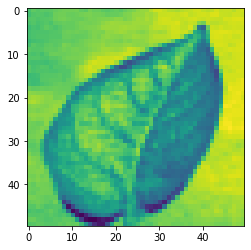

In [74]:
s12=imread("hpp.png",as_gray=True)
s12=resize(s12,(50,50))

plt.imshow(s12)
s12=s12.reshape(-1,50,50,1)
samples,nx,ny,nz=s12.shape
s12=s12.reshape(samples,nx*ny*nz)
print(xg.predict(s12))

In [115]:
from keras.optimizers import SGD
from keras.layers import Input, Concatenate, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
import keras.backend as K
from sklearn.metrics import log_loss
from custom_layers.scale_layer import Scale
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split   


def densenet121_model(img_rows, img_cols, color_type=1, nb_dense_block=4, growth_rate=32, nb_filter=64, reduction=0.5, dropout_rate=0.0, weight_decay=1e-4, num_classes=None):
    '''
    DenseNet 121 Model for Keras

    Model Schema is based on 
    https://github.com/flyyufelix/DenseNet-Keras

    # Returns
        A Keras model instance.
    '''

    # Handle Dimension Ordering for different backends
    global concat_axis
    img_input = Input(shape=(img_rows, img_cols, color_type), name='data')
    concat_axis = 3


    # From architecture for ImageNet (Table 1 in the paper)
    nb_filter = 64
    nb_layers = [6,12,24,16] # For DenseNet-121

    # Initial convolution
    x = Convolution2D(nb_filter, 7, 7, subsample=(2, 2), name='conv1', bias=False)(img_input)
    x = BatchNormalization(axis=concat_axis)(x)
    x = Scale(axis=concat_axis)(x)
    x = Activation('relu')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Add dense blocks
    for block_idx in range(nb_dense_block - 1):
        stage = block_idx+2
        x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate)

        # Add transition_block
        x = transition_block(x, stage, nb_filter, dropout_rate=dropout_rate)
        nb_filter = int(nb_filter)

    final_stage = stage + 1
    x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate)

    x = BatchNormalization(axis=concat_axis)(x)
    x = Scale(axis=concat_axis )(x)
    x = Activation('relu')(x)

    x_fc = GlobalAveragePooling2D()(x)
    x_fc = Dense(1000)(x_fc)
    x_fc = Activation('softmax')(x_fc)

    model = Model(img_input, x_fc)

    # The method below works since pre-trained weights are stored in layers but not in the model
    x_newfc = GlobalAveragePooling2D()(x)
    x_newfc = Dense(num_classes)(x_newfc)
    x_newfc = Activation('softmax')(x_newfc)

    model = Model(img_input, x_newfc)

    # Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


ModuleNotFoundError: No module named 'custom_layers'

In [112]:
def conv_block(x, stage, branch, nb_filter, dropout_rate=None):
    '''Apply BatchNorm, Relu, bottleneck 1x1 Conv2D, 3x3 Conv2D, and option dropout '''


    # 1x1 Convolution (Bottleneck layer)
    inter_channel = nb_filter * 4  
    x = BatchNormalization(axis=concat_axis)(x)
    x = Scale(axis=concat_axis)(x)
    x = Activation('relu')(x)
    x = Convolution2D(inter_channel, 1, 1, bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    # 3x3 Convolution
    x = BatchNormalization(axis=concat_axis)(x)
    x = Scale(axis=concat_axis)(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D((1, 1))(x)
    x = Convolution2D(nb_filter, 3, 3, bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    return x


def transition_block(x, stage, nb_filter, dropout_rate=None):
    ''' Apply BatchNorm, 1x1 Convolution, averagePooling, optional compression, dropout  '''


    x = BatchNormalization(axis=concat_axis)(x)
    x = Scale(axis=concat_axis)(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(nb_filter), 1, 1, bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    x = AveragePooling2D((2, 2), strides=(2, 2))(x)

    return x


def dense_block(x, stage, nb_layers, nb_filter, growth_rate, dropout_rate=None, grow_nb_filters=True):
    ''' Build a dense_block where the output of each conv_block is fed to subsequent ones
        # Arguments
            x: input tensor
            stage: index for dense block
            nb_layers: the number of layers of conv_block to append to the model.
            nb_filter: number of filters
            growth_rate: growth rate
            grow_nb_filters: flag to decide to allow number of filters to grow
    '''

    concat_feat = x

    for i in range(nb_layers):
        branch = i+1
        x = conv_block(concat_feat, stage, branch, growth_rate, dropout_rate)
        concat_feat = merge([concat_feat, x], mode='concat', concat_axis=concat_axis)

        if grow_nb_filters:
            nb_filter += growth_rate

    return concat_feat, nb_filter